# Impact of Natural Disasters on Remittance Flow
Explore the dataset taken across several nations prone to different natural disasters. Examine how natural disasters like hurricanes and earthquakes affect remittance inflows to disaster-stricken countries. Using data from the World Bank on remittances as a percentage of GDP, analyze the variations in remittance volumes before, during, and after such events. 

The project will correlate remittance data with information on natural disasters, apply statistical techniques to highlight impacts, and develop predictive models. Recommend policies to support remittance-dependent communities in times of crisis, enhancing economic resilience.


**Data sources:**
- [Personal Remittances received (in USD)](https://data.worldbank.org/indicator/BX.TRF.PWKR.CD.DT?end=2022&start=2003&view=chart)
- [Personal Remittances received (% of GDP)](https://data.worldbank.org/indicator/BX.TRF.PWKR.DT.GD.ZS?end=2022&start=2003&view=chart)
- [GDP dataset](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2022&start=2003&view=chart)
- [International Disasters Data by Public EM-DAT](https://public.emdat.be/data)

**Dataset Limitations:** \
For this analysis, we restricted the dataset to remittances flow and natural disaster occurrences between the year 2000 and 2022, due to data quality issues.

## 1. Load the Datasets

In [1]:
# import needed libraries
import numpy as np
import pandas as pd

import pycountry

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# load datasets
remittances_pct = pd.read_csv("./Dataset/Personal remittances, received (% of GDP).csv", skiprows = 4)
remittances = pd.read_csv("./Dataset/Personal remittances, received (current US$).csv", skiprows = 4)
gdp = pd.read_csv("./Dataset/GDP (current US$).csv", skiprows=4)
disasters = pd.read_excel("./Dataset/Global Disasters Data.xlsx")

In [3]:
# map country codes to country name in the pycountry library
country_code_to_name = {country.alpha_3: country.name for country in pycountry.countries}

remittances_pct['Country Name'] = remittances_pct['Country Code'].map(country_code_to_name)
remittances_pct['Country Code'] = remittances_pct['Country Code'].apply(lambda x: x.upper())

remittances['Country Name'] = remittances['Country Code'].map(country_code_to_name)
remittances['Country Code'] = remittances['Country Code'].apply(lambda x: x.upper())

gdp['Country Name'] = gdp['Country Code'].map(country_code_to_name)
gdp['Country Code'] = gdp['Country Code'].apply(lambda x: x.upper())

disasters['Country'] = disasters['ISO'].map(country_code_to_name)
disasters['ISO'] = disasters['ISO'].apply(lambda x: x.upper())

In [4]:
# check first few rows of the data
remittances_pct.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN,NaN
1,NaN,AFE,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180510,1.029486,0.982369,1.347993,1.436747,1.488722,1.560329,1.541921,NaN,NaN
2,Afghanistan,AFG,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,NaN,NaN,NaN
3,NaN,AFW,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.128857,4.169626,4.692655,4.577658,4.307428,3.761344,3.927797,4.077403,NaN,NaN
4,Angola,AGO,"Personal remittances, received (% of GDP)",BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013116,NaN,NaN


In [5]:
# check first few rows of the data
remittances.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,5.364010e+07,5.268434e+07,5.614049e+07,3.692030e+07,3.426402e+07,3.498404e+07,3.584564e+07,3.827949e+07,NaN,NaN
1,NaN,AFE,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.096848e+10,1.018049e+10,1.067490e+10,1.483547e+10,1.443240e+10,1.380367e+10,1.696703e+10,1.841613e+10,NaN,NaN
2,Afghanistan,AFG,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.486247e+08,6.277108e+08,8.227316e+08,8.035465e+08,8.285719e+08,7.889171e+08,3.200000e+08,3.700000e+08,NaN,NaN
3,NaN,AFW,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,3.121737e+10,2.838990e+10,3.160172e+10,3.456412e+10,3.497810e+10,2.922822e+10,3.271158e+10,3.520283e+10,NaN,NaN
4,Angola,AGO,"Personal remittances, received (current US$)",BX.TRF.PWKR.CD.DT,NaN,NaN,NaN,NaN,NaN,NaN,...,1.111471e+07,3.988048e+06,1.418196e+06,1.579247e+06,3.445473e+06,8.053051e+06,1.263115e+07,1.400549e+07,NaN,NaN


In [6]:
# check first few rows of the gdp data
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,NaN,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,...,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN,NaN
3,NaN,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,...,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN,NaN


In [7]:
# check first few rows of the disasters data
disasters.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
2,1960-0004-SUN,Yes,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Submarine,SUN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-12-03,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25


## 2. Data Processing
- Select needed columnns in each dataset
- Convert the datasets from wide to long data format
- Impute missing values using the mean of the column

### 2.1. Clean the Remittances datasets

In [8]:
# check columns present in the remittances datasets
# remittances_pct.columns, remittances.columns

In [9]:
# check the percentage of missing values across all columns and filter for columns with more than 30% missing values
remittances.isnull().mean()[remittances.isnull().mean() * 100 > 30] * 100

1960           100.000000
1961           100.000000
1962           100.000000
1963           100.000000
1964           100.000000
1965           100.000000
1966           100.000000
1967           100.000000
1968           100.000000
1969           100.000000
1970            83.458647
1971            78.947368
1972            78.195489
1973            78.195489
1974            73.308271
1975            65.413534
1976            60.150376
1977            53.383459
1978            50.751880
1979            48.872180
1980            48.120301
1981            48.120301
1982            46.992481
1983            45.488722
1984            45.488722
1985            45.488722
1986            43.609023
1987            42.481203
1988            42.105263
1989            41.729323
1990            40.977444
1991            40.225564
1992            36.842105
1993            34.210526
1994            32.706767
1995            30.451128
2023           100.000000
Unnamed: 68    100.000000
dtype: float

In [10]:
remittances_pct.isnull().mean()[remittances_pct.isnull().mean() * 100 > 30] * 100

1960           100.000000
1961           100.000000
1962           100.000000
1963           100.000000
1964           100.000000
1965           100.000000
1966           100.000000
1967           100.000000
1968           100.000000
1969           100.000000
1970            95.864662
1971            94.736842
1972            93.984962
1973            93.984962
1974            89.473684
1975            80.451128
1976            75.187970
1977            64.285714
1978            62.781955
1979            59.022556
1980            57.518797
1981            56.015038
1982            52.255639
1983            49.624060
1984            50.375940
1985            50.000000
1986            48.120301
1987            48.120301
1988            49.624060
1989            47.368421
1990            46.240602
1991            43.233083
1992            41.353383
1993            38.345865
1994            35.338346
1995            31.203008
1997            30.075188
2023           100.000000
Unnamed: 68 

> It appears that majority of the years before 2000 have more than 30% missing values. Hence, going forward we will restrict the dataset to between 2000 and 2022

In [11]:
remittances[remittances.select_dtypes(include='object').columns.to_list()].nunique()
# remittances_pct[remittances_pct.select_dtypes(include='object').columns.to_list()].nunique()

Country Name      215
Country Code      266
Indicator Name      1
Indicator Code      1
dtype: int64

In [12]:
remittances['Unnamed: 68'].isna().mean() * 100

100.0

- Seems like there are country codes without country names. Hence, we rows where country name is absent.
- There are also single value columns, we drop those as well.
- We also drop the 'Unnamed: 68' column since it has 100% missing values.

In [13]:
# drop rows where country name is missing
remittances_pct.dropna(subset = "Country Name", inplace=True)
remittances.dropna(subset = "Country Name", inplace=True)
gdp.dropna(subset = "Country Name", inplace=True)

In [14]:
# drop columns with just a single unique value and column with 100% missing value
cols_to_drop = ["Indicator Name", "Indicator Code", "Unnamed: 68"]

remittances_pct.drop(columns = cols_to_drop, inplace = True)
remittances.drop(columns = cols_to_drop, inplace = True)
gdp.drop(columns = cols_to_drop, inplace = True)

In [15]:
remittances.select_dtypes(include='number').columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [16]:
# convert the remittance dataframe from wide to long format
# select needed year columns
year_cols = remittances.select_dtypes(include='number').columns

remittances_pct = remittances_pct.melt(id_vars = ["Country Name", "Country Code"], 
                                       value_vars = year_cols, var_name = "Year", value_name = "%Remittance")

remittances = remittances.melt(id_vars = ["Country Name", "Country Code"], 
                               value_vars = year_cols, var_name = "Year", value_name = "Remittance")

remittances_pct.head()

,Country Name,Country Code,Year,%Remittance
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,NaN
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [17]:
remittances.head()

,Country Name,Country Code,Year,Remittance
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,NaN
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [18]:
# convert the gdp dataframe from wide to long format
gdp = gdp.melt(id_vars = ["Country Name", "Country Code"], value_vars = year_cols, var_name = "Year", value_name = "GDP")
gdp.head()

,Country Name,Country Code,Year,GDP
0,Aruba,ABW,1960,NaN
1,Afghanistan,AFG,1960,5.377778e+08
2,Angola,AGO,1960,NaN
3,Albania,ALB,1960,NaN
4,Andorra,AND,1960,NaN


In [19]:
# combine the remittances USD values, remittance as a percent of GDP and the GDP data into one dataframe
remittances_df = (remittances
                  .merge(remittances_pct, on = ["Country Name", "Country Code", "Year"])
                  .merge(gdp, on = ["Country Name", "Country Code", "Year"])
                  .reset_index(drop=True)
                 )
print(remittances_df.shape)
remittances_df.head()

(13760, 6)


,Country Name,Country Code,Year,Remittance,%Remittance,GDP
0,Aruba,ABW,1960,NaN,NaN,NaN
1,Afghanistan,AFG,1960,NaN,NaN,5.377778e+08
2,Angola,AGO,1960,NaN,NaN,NaN
3,Albania,ALB,1960,NaN,NaN,NaN
4,Andorra,AND,1960,NaN,NaN,NaN


In [20]:
# select years between 2000 and 2022
remittances_df["Year"] = remittances_df["Year"].astype(int)
remittances_df = remittances_df[remittances_df.Year.astype(int).between(2000,2022)].reset_index(drop=True)

print(remittances_df.shape)
remittances_df.head()

(4945, 6)


,Country Name,Country Code,Year,Remittance,%Remittance,GDP
0,Aruba,ABW,2000,1.083799e+06,0.057850,1.873453e+09
1,Afghanistan,AFG,2000,NaN,NaN,NaN
2,Angola,AGO,2000,NaN,NaN,9.129595e+09
3,Albania,ALB,2000,5.978000e+08,17.176407,3.480355e+09
4,Andorra,AND,2000,NaN,NaN,1.429048e+09


In [21]:
# Fill null values with the median of each country
remittances_df['Remittance'] = remittances_df.groupby('Country Name')['Remittance'].transform(lambda x: x.fillna(x.mean()))
remittances_df['%Remittance'] = (remittances_df
                                 .groupby('Country Name')['%Remittance']
                                 .transform(lambda x: x.fillna(x.mean()))
                                )
remittances_df['GDP'] = remittances_df.groupby('Country Name')['GDP'].transform(lambda x: x.fillna(x.mean()))

# View the results (optional)
remittances_df.head()

,Country Name,Country Code,Year,Remittance,%Remittance,GDP
0,Aruba,ABW,2000,1.083799e+06,0.057850,1.873453e+09
1,Afghanistan,AFG,2000,3.620895e+08,2.011777,1.401559e+10
2,Angola,AGO,2000,1.470088e+07,0.015215,9.129595e+09
3,Albania,ALB,2000,5.978000e+08,17.176407,3.480355e+09
4,Andorra,AND,2000,6.750986e+06,0.216824,1.429048e+09


In [22]:
# check for duplicates
remittances_df.duplicated().sum()

0

In [23]:
# check the amount of missing values in each feature
remittances_df.isnull().mean() *100

Country Name    0.000000
Country Code    0.000000
Year            0.000000
Remittance      7.906977
%Remittance     7.906977
GDP             1.395349
dtype: float64

In [24]:
# drop the missing values in dataframe as they are few
remittances_df.dropna(inplace = True, ignore_index=True)

### 2.2. Clean the Disasters Dataset
- Select just natural occurring disasters
- Select needed columns and rename columns where needed
- Check for duplicates and missing values

In [25]:
# check columns in the disasters dataframe
disasters.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [26]:
disasters

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
2,1960-0004-SUN,Yes,tec-tra-wat-wat,Technological,Transport,Water,Water,NaN,Submarine,SUN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-12-03,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25296,2024-0256-SEN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,SEN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-26,2024-04-26
25297,2024-0257-GIN,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,GIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-26,2024-04-26
25298,2024-9075-COL,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000013,NaN,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":939,""adm1_name"":""Boyaca""},{""adm1...",2024-02-13,2024-04-10
25299,2024-9131-ZMB,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000018,NaN,ZMB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-04-12


In [27]:
disasters[disasters["Disaster Group"] == "Natural"].drop_duplicates()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1960-0001-BGD,Yes,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2003-07-01,2023-09-25
1,1960-0002-IRN,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,IRN,...,NaN,NaN,NaN,NaN,20000.0,206054.0,9.706216,NaN,2007-11-08,2023-09-25
3,1960-0007-PER,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,9.706216,NaN,2004-04-13,2023-09-25
4,1960-0008-NIU,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Corine,NIU,...,NaN,NaN,NaN,NaN,41.0,422.0,9.706216,NaN,2003-07-01,2023-09-25
6,1960-0010-MAR,Yes,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,MAR,...,NaN,NaN,NaN,NaN,120000.0,1236321.0,9.706216,NaN,2004-04-13,2023-10-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25291,2024-0242-THA,No,nat-met-sto-sev,Natural,Meteorological,Storm,Severe weather,NaN,NaN,THA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-23,2024-04-26
25294,2024-0249-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-04-25,2024-04-26
25298,2024-9075-COL,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000013,NaN,COL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{""adm1_code"":939,""adm1_name"":""Boyaca""},{""adm1...",2024-02-13,2024-04-10
25299,2024-9131-ZMB,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,GLIDE:DR-2024-000018,NaN,ZMB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-12,2024-04-12


In [28]:
# subset the dataframe to get naturally occuring disasters
disasters = disasters[disasters["Disaster Group"] == "Natural"]
print(disasters["Disaster Group"].unique())

# select only the needed columns
relevant_cols = ['Disaster Type', 'ISO', 'Country', 'Start Year', 'Total Deaths', 'Total Affected']
disasters = disasters[relevant_cols].copy()

disasters.head()

['Natural']


,Disaster Type,ISO,Country,Start Year,Total Deaths,Total Affected
0,Flood,BGD,Bangladesh,1960,10000.0,NaN
1,Earthquake,IRN,"Iran, Islamic Republic of",1960,480.0,NaN
3,Earthquake,PER,Peru,1960,63.0,200.0
4,Storm,NIU,Niue,1960,NaN,4000.0
6,Earthquake,MAR,Morocco,1960,13100.0,NaN


In [29]:
# check for duplicates
disasters.duplicated().sum()

264

In [30]:
# check out some of the duplicated rows
disasters[disasters.duplicated(keep=False)].head(10)

,Disaster Type,ISO,Country,Start Year,Total Deaths,Total Affected
870,Storm,VUT,Vanuatu,1972,NaN,NaN
882,Storm,VUT,Vanuatu,1972,NaN,NaN
1153,Volcanic activity,ECU,Ecuador,1975,NaN,NaN
1207,Volcanic activity,ECU,Ecuador,1975,NaN,NaN
1326,Drought,AUS,Australia,1976,NaN,NaN
1327,Drought,AUS,Australia,1976,NaN,NaN
1655,Storm,USA,United States,1978,25.0,NaN
1656,Storm,USA,United States,1978,25.0,NaN
2027,Storm,VUT,Vanuatu,1981,NaN,NaN
2102,Storm,VUT,Vanuatu,1981,NaN,NaN


In [31]:
# drop duplicates rows in the disasters datasets
print(disasters.shape)
disasters.drop_duplicates(inplace=True, keep='first')

# confirm there are no more duplicates
print(disasters.duplicated().sum())
print(disasters.shape)

(16197, 6)
0
(15933, 6)


In [32]:
# rename the disasters dataframe columns
disasters.rename(columns = {"ISO": "Country Code", "Country":"Country Name", "Start Year":"Year"}, inplace = True)

# select disasters that occurred between 2000 and 2022
disasters["Year"] = disasters["Year"].astype(int)
disasters = disasters[(disasters["Year"] >= 2000) & (disasters["Year"] < 2023)].reset_index(drop=True)

In [33]:
# # fill the missing values by mean of its subset
# disasters['Total Deaths'] = disasters.groupby(['Country Name', 'Disaster Type'])['Total Deaths'].transform(lambda x: x.fillna(x.mean()))
# disasters['Total Affected'] = disasters.groupby(['Country Name', 'Disaster Type'])['Total Affected'].transform(lambda x: x.fillna(x.mean()))
# disasters.head()

In [34]:
# fill the null values of Total Deaths and Total affected by the mean values of Death Tolls and Affected per Disaster Type
group_means_deaths = disasters.groupby(['Country Name', 'Disaster Type'])['Total Deaths'].transform('mean')
disasters['Total Deaths'] = disasters['Total Deaths'].fillna(group_means_deaths)

group_means_affected = disasters.groupby(['Country Name', 'Disaster Type'])['Total Affected'].transform('mean')
disasters['Total Affected'] = disasters['Total Affected'].fillna(group_means_affected)


In [35]:
disasters.nunique()

Disaster Type       14
Country Code       218
Country Name       216
Year                23
Total Deaths       774
Total Affected    4158
dtype: int64

In [36]:
# drop rows with missing country names
disasters.dropna(subset = "Country Name", inplace=True, ignore_index=True)

In [37]:
# check the percentage of missing values
disasters.isnull().mean() * 100

Disaster Type     0.000000
Country Code      0.000000
Country Name      0.000000
Year              0.000000
Total Deaths      5.481639
Total Affected    2.937733
dtype: float64

In [38]:
disasters.dropna(inplace=True, ignore_index=True)

### 2.3. Merge the Datasets
Next, we merge the remittance and disasters datasets

In [39]:
# check the summary of the remittances dataset
remittances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  4554 non-null   object 
 1   Country Code  4554 non-null   object 
 2   Year          4554 non-null   int32  
 3   Remittance    4554 non-null   float64
 4   %Remittance   4554 non-null   float64
 5   GDP           4554 non-null   float64
dtypes: float64(3), int32(1), object(2)
memory usage: 195.8+ KB


In [40]:
# check the summary of the disasters dataset
disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8699 entries, 0 to 8698
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Disaster Type   8699 non-null   object 
 1   Country Code    8699 non-null   object 
 2   Country Name    8699 non-null   object 
 3   Year            8699 non-null   int32  
 4   Total Deaths    8699 non-null   float64
 5   Total Affected  8699 non-null   float64
dtypes: float64(2), int32(1), object(3)
memory usage: 373.9+ KB


In [41]:
# change datatype of death toll and total affected to integer as we can't have fractional deaths.
disasters['Total Deaths'] = disasters['Total Deaths'].astype(int)
disasters['Total Affected'] = disasters['Total Affected'].astype(int)

# merged both dataframes
merged_data = pd.merge(remittances_df, disasters, on = ["Country Name", "Country Code", "Year"], how = "left")
print(merged_data.shape)
merged_data.head()

(10571, 9)


,Country Name,Country Code,Year,Remittance,%Remittance,GDP,Disaster Type,Total Deaths,Total Affected
0,Aruba,ABW,2000,1.083799e+06,0.057850,1.873453e+09,NaN,NaN,NaN
1,Afghanistan,AFG,2000,3.620895e+08,2.011777,1.401559e+10,Epidemic,507.0,19802.0
2,Afghanistan,AFG,2000,3.620895e+08,2.011777,1.401559e+10,Epidemic,16.0,11.0
3,Afghanistan,AFG,2000,3.620895e+08,2.011777,1.401559e+10,Epidemic,19.0,1604.0
4,Afghanistan,AFG,2000,3.620895e+08,2.011777,1.401559e+10,Epidemic,15.0,613.0


### 2.4. Data Quality Check on the Merged Dataset
- Check for and Handle Duplicate Data
- Check for and Handle Missing Data

In [42]:
merged_data.duplicated().sum()

9

In [43]:
merged_data.drop_duplicates(inplace=True, keep='first')

In [44]:
# check the missing values in the dataframe
merged_data.isnull().sum()

Country Name         0
Country Code         0
Year                 0
Remittance           0
%Remittance          0
GDP                  0
Disaster Type     2052
Total Deaths      2052
Total Affected    2052
dtype: int64

In [45]:
# percentage of missing values
merged_data.isnull().mean() * 100

Country Name       0.000000
Country Code       0.000000
Year               0.000000
Remittance         0.000000
%Remittance        0.000000
GDP                0.000000
Disaster Type     19.428139
Total Deaths      19.428139
Total Affected    19.428139
dtype: float64

### 2.5. Feature Engineering
- Add a column counting the Total Disaster Type that occurred per country per year
- Add a column showing the year on year change in remittance USD value across the years per country
- And another column containing the year on year difference in remittance (as % of GDP) value across the years per country

In [46]:
# to remove duplicate rows, let's group the data by country, year AND count the Total Disaster Type as well as 
# sum the total deaths and affected; taking out the disaster type column in the process
final_table = (merged_data
                     .groupby(['Country Name', 'Country Code', 'Year', 'GDP', 'Remittance', '%Remittance'])
                     .agg({'Disaster Type': 'count', 'Total Deaths': 'sum', 'Total Affected': 'sum'})
                     .rename({'Disaster Type': 'Total Disaster Type'}, axis=1)
                     .reset_index()
                     .sort_values(by=['Country Name', 'Year'])
                    )

print(final_table.shape)
final_table.head()

(4554, 9)


,Country Name,Country Code,Year,GDP,Remittance,%Remittance,Total Disaster Type,Total Deaths,Total Affected
0,Afghanistan,AFG,2000,1.401559e+10,3.620895e+08,2.011777,5,594.0,2602030.0
1,Afghanistan,AFG,2001,1.401559e+10,3.620895e+08,2.011777,6,642.0,240604.0
2,Afghanistan,AFG,2002,3.825701e+09,3.620895e+08,2.011777,16,4381.0,407495.0
3,Afghanistan,AFG,2003,4.520947e+09,3.620895e+08,2.011777,9,184.0,33988.0
4,Afghanistan,AFG,2004,5.224897e+09,3.620895e+08,2.011777,3,65.0,5540.0


Same remittance values for some countries across different years because we filled null values with the mean earlier.

In [47]:
# year on year change in remittance USD value across the years per country
final_table['YoY Remittance Change'] = (final_table
                                              .sort_values(by=['Country Name', 'Year'])
                                              .groupby('Country Name')['Remittance']
                                              .pct_change()
                                              .round(3)
                                             )

# year on year difference in remittance (as % of GDP) value across the years per country
final_table['YoY %Remittance Difference'] = final_table.groupby('Country Name')['%Remittance'].diff().round(3)

final_table.head(9)

,Country Name,Country Code,Year,GDP,Remittance,%Remittance,Total Disaster Type,Total Deaths,Total Affected,YoY Remittance Change,YoY %Remittance Difference
0,Afghanistan,AFG,2000,1.401559e+10,3.620895e+08,2.011777,5,594.0,2602030.0,NaN,NaN
1,Afghanistan,AFG,2001,1.401559e+10,3.620895e+08,2.011777,6,642.0,240604.0,0.0,0.000
2,Afghanistan,AFG,2002,3.825701e+09,3.620895e+08,2.011777,16,4381.0,407495.0,0.0,0.000
3,Afghanistan,AFG,2003,4.520947e+09,3.620895e+08,2.011777,9,184.0,33988.0,0.0,0.000
4,Afghanistan,AFG,2004,5.224897e+09,3.620895e+08,2.011777,3,65.0,5540.0,0.0,0.000
5,Afghanistan,AFG,2005,6.203256e+09,0.000000e+00,0.000000,13,962.0,202551.0,-1.0,-2.012
6,Afghanistan,AFG,2006,6.971758e+09,0.000000e+00,0.000000,13,466.0,2293966.0,NaN,0.000
7,Afghanistan,AFG,2007,9.747886e+09,0.000000e+00,0.000000,7,296.0,44872.0,NaN,0.000
8,Afghanistan,AFG,2008,1.010930e+10,8.954044e+07,0.885724,4,1418.0,452964.0,inf,0.886


In [48]:
# percentage of missing values
final_table.isnull().mean() * 100

Country Name                  0.000000
Country Code                  0.000000
Year                          0.000000
GDP                           0.000000
Remittance                    0.000000
%Remittance                   0.000000
Total Disaster Type           0.000000
Total Deaths                  0.000000
Total Affected                0.000000
YoY Remittance Change         9.793588
YoY %Remittance Difference    4.347826
dtype: float64

In [49]:
final_table.replace([np.inf, -np.inf], np.nan, inplace=True)
final_table.fillna(0, inplace=True)
# percentage of missing values
final_table.isnull().mean() * 100

Country Name                  0.0
Country Code                  0.0
Year                          0.0
GDP                           0.0
Remittance                    0.0
%Remittance                   0.0
Total Disaster Type           0.0
Total Deaths                  0.0
Total Affected                0.0
YoY Remittance Change         0.0
YoY %Remittance Difference    0.0
dtype: float64

In [50]:
final_table.head(11)
# final_table[final_table['Country Name']=='Nigeria'].head(39)

,Country Name,Country Code,Year,GDP,Remittance,%Remittance,Total Disaster Type,Total Deaths,Total Affected,YoY Remittance Change,YoY %Remittance Difference
0,Afghanistan,AFG,2000,1.401559e+10,3.620895e+08,2.011777,5,594.0,2602030.0,0.000,0.000
1,Afghanistan,AFG,2001,1.401559e+10,3.620895e+08,2.011777,6,642.0,240604.0,0.000,0.000
2,Afghanistan,AFG,2002,3.825701e+09,3.620895e+08,2.011777,16,4381.0,407495.0,0.000,0.000
3,Afghanistan,AFG,2003,4.520947e+09,3.620895e+08,2.011777,9,184.0,33988.0,0.000,0.000
4,Afghanistan,AFG,2004,5.224897e+09,3.620895e+08,2.011777,3,65.0,5540.0,0.000,0.000
5,Afghanistan,AFG,2005,6.203256e+09,0.000000e+00,0.000000,13,962.0,202551.0,-1.000,-2.012
6,Afghanistan,AFG,2006,6.971758e+09,0.000000e+00,0.000000,13,466.0,2293966.0,0.000,0.000
7,Afghanistan,AFG,2007,9.747886e+09,0.000000e+00,0.000000,7,296.0,44872.0,0.000,0.000
8,Afghanistan,AFG,2008,1.010930e+10,8.954044e+07,0.885724,4,1418.0,452964.0,0.000,0.886
9,Afghanistan,AFG,2009,1.241615e+10,1.406952e+08,1.133162,5,101.0,80474.0,0.571,0.247


In [51]:
# save the merged dataframe as csv
final_table.to_csv("remittances_disasters.csv", index=False)

# data summary 
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                4554 non-null   object 
 1   Country Code                4554 non-null   object 
 2   Year                        4554 non-null   int32  
 3   GDP                         4554 non-null   float64
 4   Remittance                  4554 non-null   float64
 5   %Remittance                 4554 non-null   float64
 6   Total Disaster Type         4554 non-null   int64  
 7   Total Deaths                4554 non-null   float64
 8   Total Affected              4554 non-null   float64
 9   YoY Remittance Change       4554 non-null   float64
 10  YoY %Remittance Difference  4554 non-null   float64
dtypes: float64(7), int32(1), int64(1), object(2)
memory usage: 373.7+ KB


## 3. Data Visualization
### How Natural Disasters Affect Remittance Inflows To Disaster-stricken Countries

### 3.1 Correlation Plot
First, let's check the relationship between the remittances and the natural disaster variables in the dataset

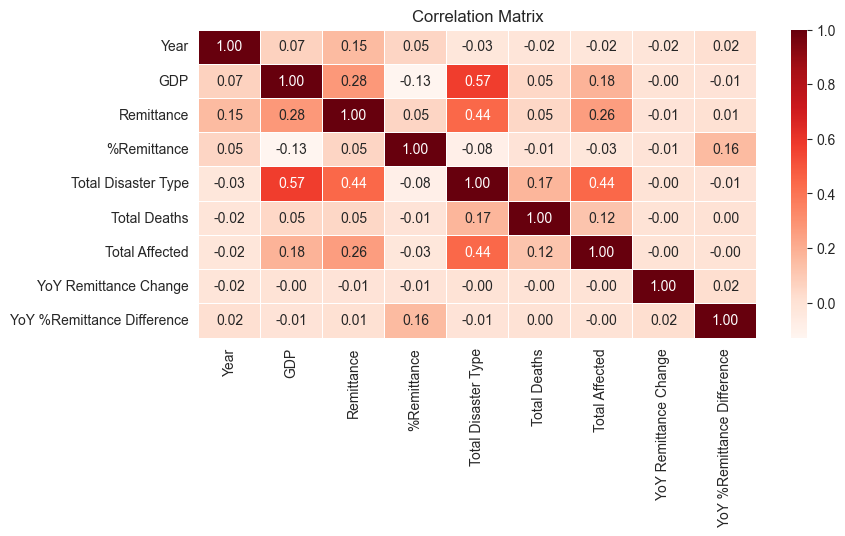

In [52]:
# Compute the correlation matrix
numeric_columns = final_table.select_dtypes(include='number').columns
df_numeric = final_table[numeric_columns]

corr_matrix = df_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(9, 4))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

>- There is a moderate positive correlation (0.28) between **`Remittance`** and **`GDP`**. This suggests that **as a country's GDP increases, the inflow of remittances also tends to increase**.
>- Conversely, there is a slight negative correlation (-0.13) between the **`%Remittance`** (percentage of GDP made up by remittances) and **`GDP`**. This indicates that as a country's GDP grows, the contribution of remittances to the overall GDP decreases. In other words, **countries with larger GDPs are less dependent on remittances, whereas countries with smaller GDPs rely more on remittance inflows**.
>- There is some correlation (0.26) between **`Remittance`** and **`Total Affected`** by natural disasters. This **implies that as the number of people affected by natural disasters increases, the inflow of remittances also tends to increase**.
> - An even stronger correlation (0.44) exists between **`Remittance`** and **`Total Disaster Type`**, **suggesting that remittance inflows rise as the number of disaster types occurring in a country increases**.
> - There is also some correlation between **`Total Affected`** and **`Total Disaster Type`**, as well as, **`Total Deaths`** and **`Total Disaster Type`**. This indicates that as the number of different types of disasters increases, the number of people affected and number of deaths also increases, which is an expected outcome.

### 3.2. Which Countries are prone to Natural Disasters?
- The disaster-stricken countries

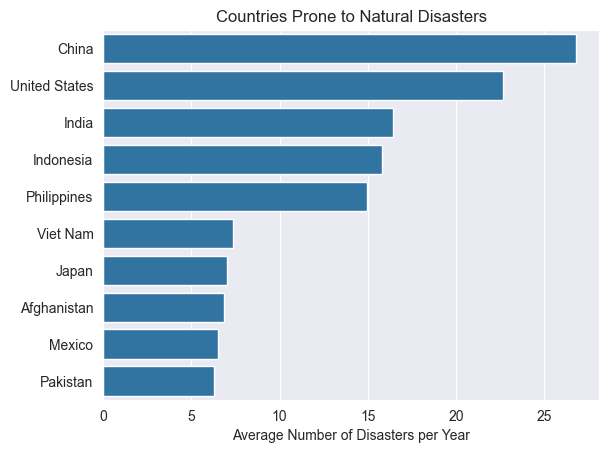

In [53]:
# average number of disaster occurrences per each country
disasters_by_country = (final_table
                         .groupby('Country Name')['Total Disaster Type']
                         .mean()
                         .reset_index()
                        )

# countries with the most average recorded disasters per year in the dataset
disasters_by_country_top_10 = (disasters_by_country
                        .sort_values(by="Total Disaster Type", ascending=False)
                        .head(10)
                        .set_index('Country Name')
                        .reset_index()
                       )

# barplot for countries with the most average number of disasters per year
sns.barplot(y='Country Name', x='Total Disaster Type', data=disasters_by_country_top_10, orient='h')
plt.title('Countries Prone to Natural Disasters')
plt.ylabel('')
plt.xlabel('Average Number of Disasters per Year')

plt.show()

In [54]:
# # countries with the least recorded disasters across all years in the dataset
# # check the countries with the least recorded disasters in the dataset, excluding countries with 0 disasters
# disasters_by_country_bottom_30 = (disasters_by_country[disasters_by_country['Total Disaster Type'] != 0]
#                                   .sort_values(by="Total Disaster Type", ascending=True)
#                                   .head(10)
#                                   .set_index('Country Name')
#                                   .reset_index()
#                                  )


# # plot the countries with the least recorded disasters in the dataset
# # barplot for countries with the most disasters across the years
# sns.barplot(y='Country Name', x='Total Disaster Type', data=disasters_by_country_bottom_30, orient='h')
# plt.title('Countries Least Prone to Disasters')
# plt.ylabel('')
# plt.xlabel('Total Disasters')

# plt.show()

### 3.3. Which Countries received the most and least remittances?

In [55]:
# Custom formatter function to convert xs to millions / billions with USD
def format_millions_billions(x, pos):
    if pd.notnull(x):  # Ensure the x is not NaN
        if x >= 1e9:
            return f"${x * 1e-9:.1f}B"  # Format in billions
        elif x >= 1e6:
            return f"${x * 1e-6:.1f}M"  # Format in millions
        elif x < 1e6:
            return f"${x / 1e6:.1f}M"  # Format in millions
    return x

In [56]:
# Custom formatter function to convert xs to percentage
def format_percentage(x, pos):
    if pd.notnull(x):  # Ensure the x is not NaN
        if x >= 0.1:
            return f"{x :.0f}%"  # Format in percentage
        else:
            return f"{x :.2f}%"  # Format in percentage
    return x

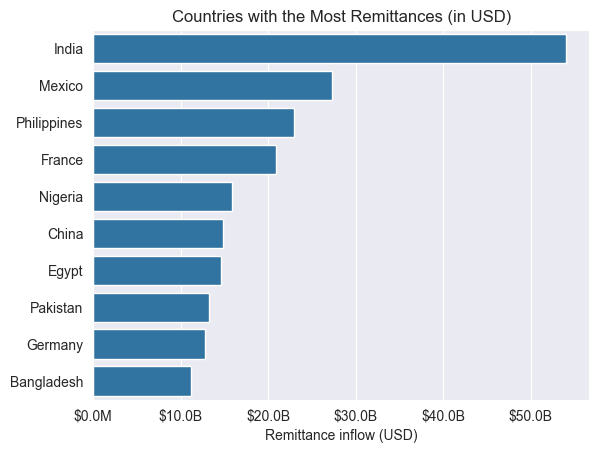

In [57]:
# average remittances recieved per each country per year
remittance_by_country = (final_table
                         .groupby('Country Name')['Remittance']
                         .mean()
                         .reset_index()
                        )

# country with the most remittances
top_10_remittances_by_country = remittance_by_country.sort_values(by="Remittance", ascending=False).head(10)
# top_10_remittances_by_country.set_index('Country Name').reset_index()


# barplot for countries with the least Remittance inflow (USD) across the years
sns.barplot(y='Country Name', x='Remittance', data=top_10_remittances_by_country, orient='h')
plt.title('Countries with the Most Remittances (in USD)')
plt.ylabel('')
plt.xlabel('Remittance inflow (USD)')

# Apply the formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_millions_billions))

plt.show()

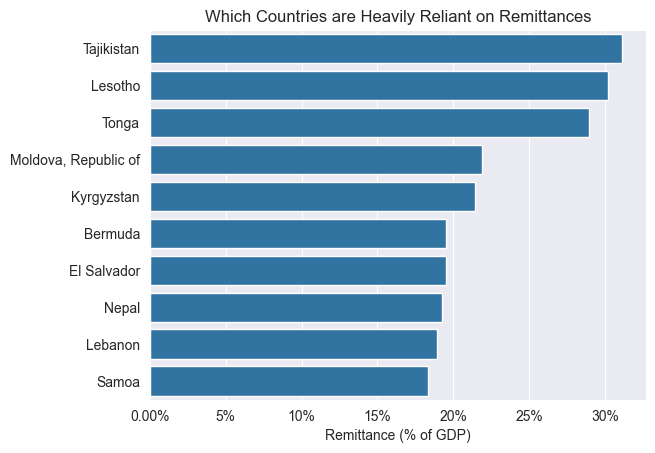

In [58]:
# average %remittance recieved by each country per year
remittance_pct_by_country = (final_table
                         .groupby('Country Name')['%Remittance']
                         .mean()
                         .reset_index()
                        )


# country with the most %remittances
top_10_remittances_pct_by_country = remittance_pct_by_country.sort_values(by="%Remittance", ascending=False).head(10)
# top_10_remittances_pct_by_country.set_index('Country Name').reset_index()


# barplot for countries with the least Remittance inflow (USD) across the years
sns.barplot(y='Country Name', x='%Remittance', data=top_10_remittances_pct_by_country, orient='h')
plt.title('Which Countries are Heavily Reliant on Remittances')
plt.ylabel('')
plt.xlabel('Remittance (% of GDP)')

# Apply the formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_percentage))

plt.show()

> These are countries where their GDP is heavily reliant on remittances

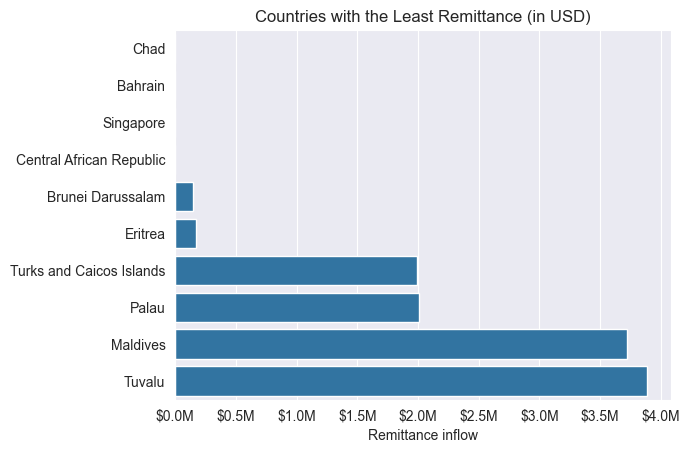

In [59]:
# country with the least remittances
bottom_10_remittances_by_country = remittance_by_country.sort_values(by="Remittance", ascending=True).head(10)
# bottom_10_remittances_by_country.set_index('Country Name').reset_index()


# barplot for countries with the least Remittance inflow (USD) across the years
sns.barplot(y='Country Name', x='Remittance', data=bottom_10_remittances_by_country, orient='h')
plt.title('Countries with the Least Remittance (in USD)')
plt.ylabel('')
plt.xlabel('Remittance inflow')


# Apply the formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_millions_billions))

plt.show()

> The least remitted within this period is 0, this is can be due to the fact that the amount have been converted to dollars.**


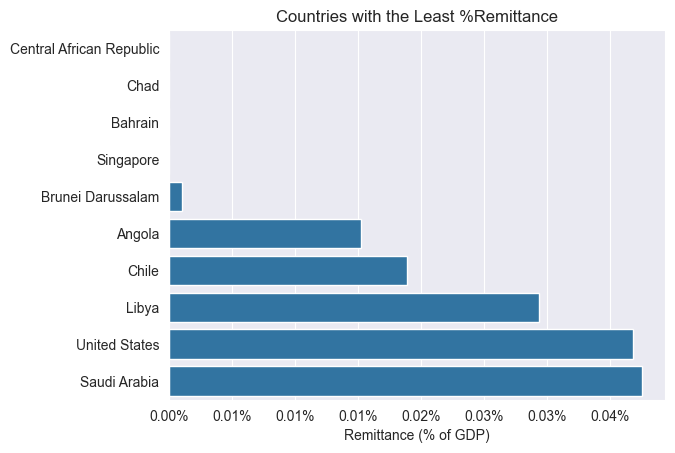

In [60]:
# country with the least remittances
bottom_10_remittances_pct_by_country = remittance_pct_by_country.sort_values(by="%Remittance", ascending=True).head(10)
# bottom_10_remittances_by_country.set_index('Country Name').reset_index()


# barplot for countries with the least Remittance inflow (USD) across the years
sns.barplot(y='Country Name', x='%Remittance', data=bottom_10_remittances_pct_by_country, orient='h')
plt.title('Countries with the Least %Remittance')
plt.ylabel('')
plt.xlabel('Remittance (% of GDP)')


# Apply the formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_percentage))

plt.show()

### 3.4. Remittance Inflows per Year

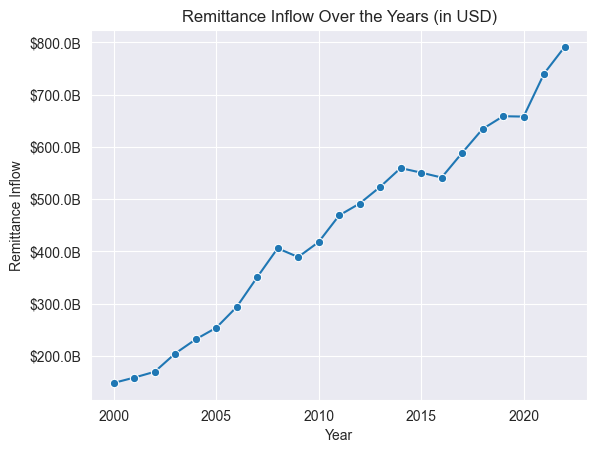

In [61]:
# total remittances per year across all countries
remittances_per_year = final_table.groupby('Year')['Remittance'].sum().reset_index()

# Time series plot for remittance inflow
# plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Remittance', data=remittances_per_year, marker='o')
plt.title('Remittance Inflow Over the Years (in USD)')
plt.xlabel('Year')
plt.ylabel('Remittance Inflow')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions_billions))

plt.show()


### 3.5. Total Disasters per Year

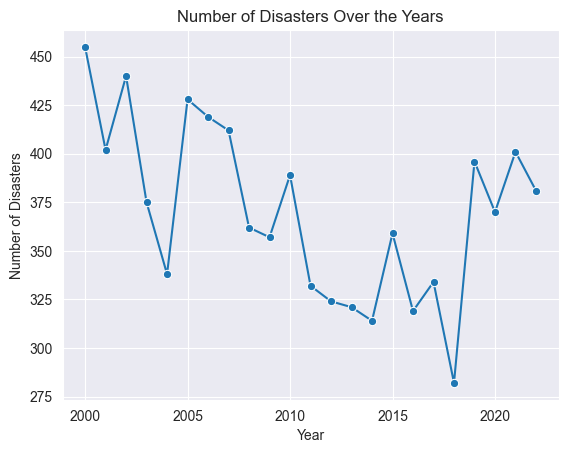

In [62]:
# total natural disasters recorded per year across all countries
disasters_per_year = final_table.groupby('Year')['Total Disaster Type'].sum().reset_index()

# Time series plot for remittance inflow
sns.lineplot(x='Year', y='Total Disaster Type', data=disasters_per_year, marker='o')
plt.title('Number of Disasters Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')

plt.show()


### 3.6. Total Affected Persons

In [63]:
# Custom formatter function to convert y-axis to billions USD
def millions_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)

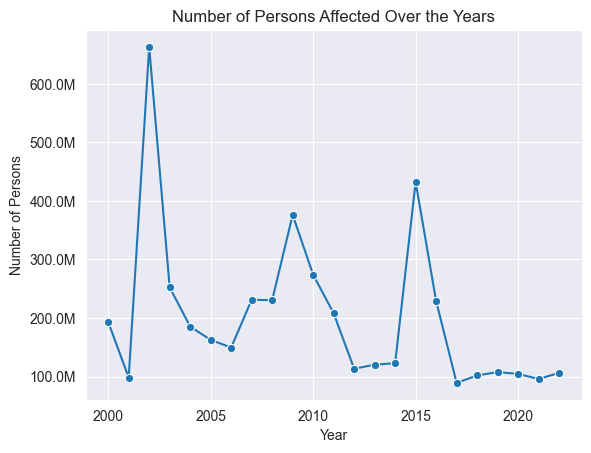

In [64]:
# total natural disasters recorded per year across all countries
disasters_per_year = final_table.groupby('Year')['Total Affected'].sum().reset_index()

# Time series plot for remittance inflow
sns.lineplot(x='Year', y='Total Affected', data=disasters_per_year, marker='o')
plt.title('Number of Persons Affected Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Persons')

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()


### 3.7. Nigeria as a case study

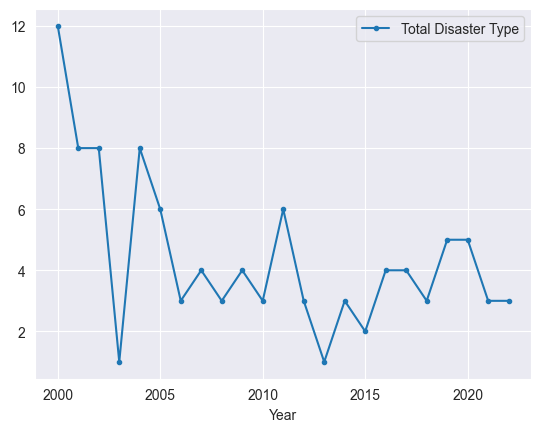

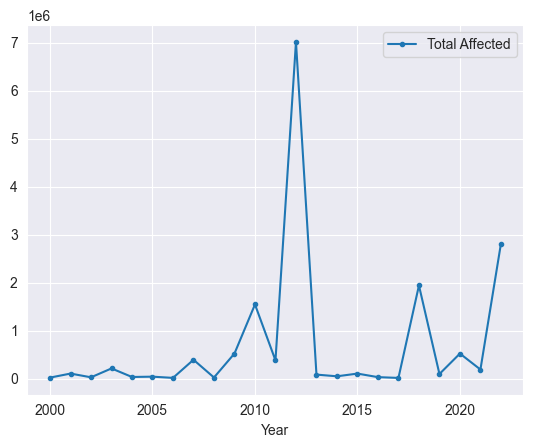

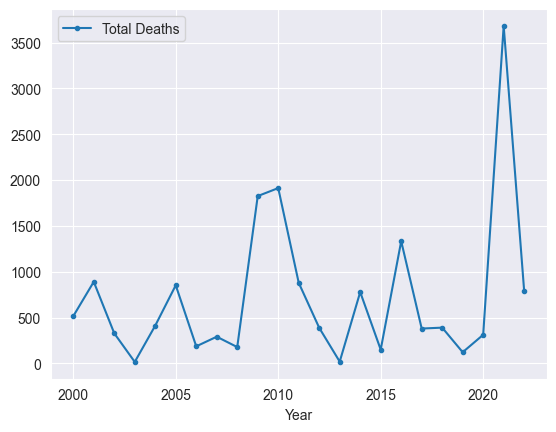

In [65]:
final_table[final_table['Country Name']=='Nigeria'][['Year', 'Total Disaster Type']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Nigeria'][['Year', 'Total Affected']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Nigeria'][['Year', 'Total Deaths']].set_index('Year').plot(marker='.');

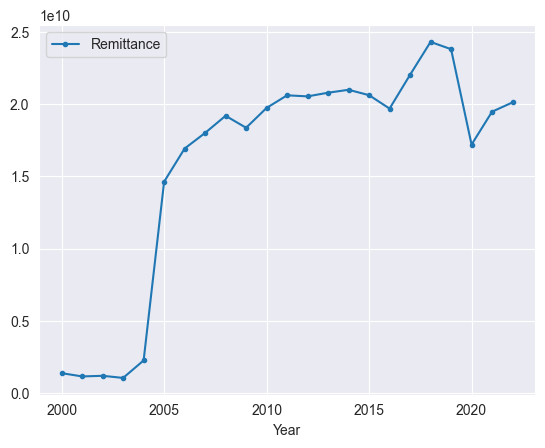

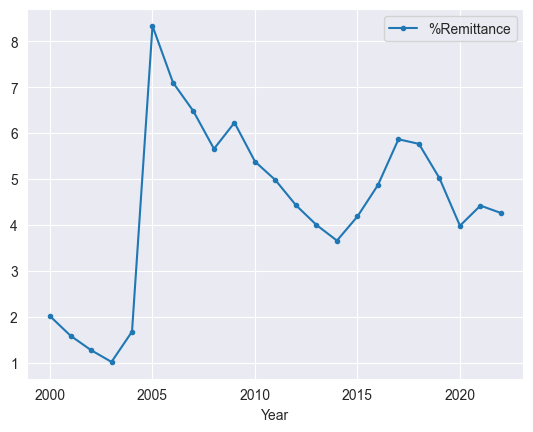

In [66]:
final_table[final_table['Country Name']=='Nigeria'][['Year', 'Remittance']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Nigeria'][['Year', '%Remittance']].set_index('Year').plot(marker='.');

### 3.8. India as a case study

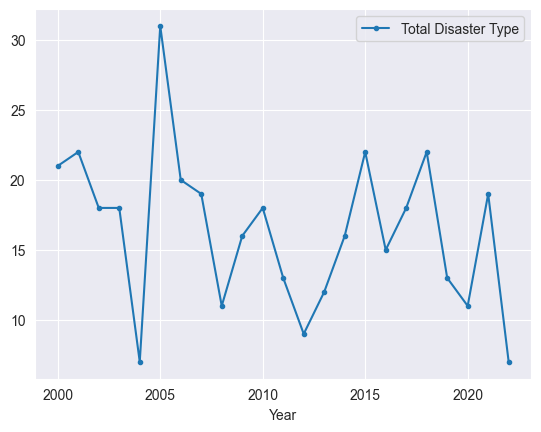

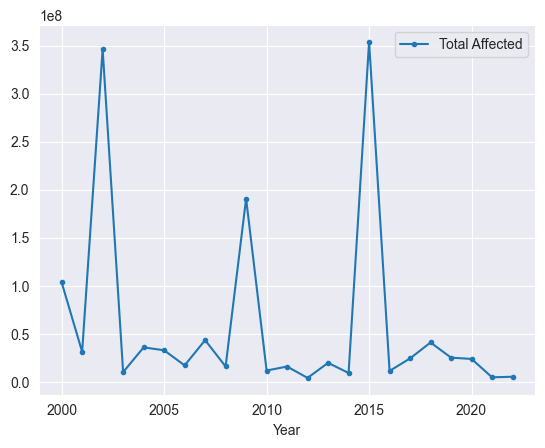

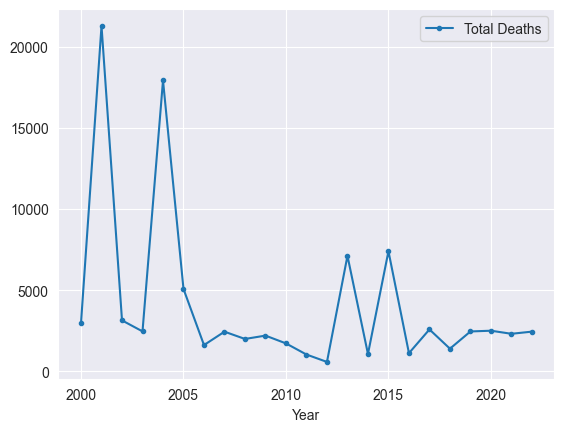

In [67]:
final_table[final_table['Country Name']=='India'][['Year', 'Total Disaster Type']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='India'][['Year', 'Total Affected']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='India'][['Year', 'Total Deaths']].set_index('Year').plot(marker='.');

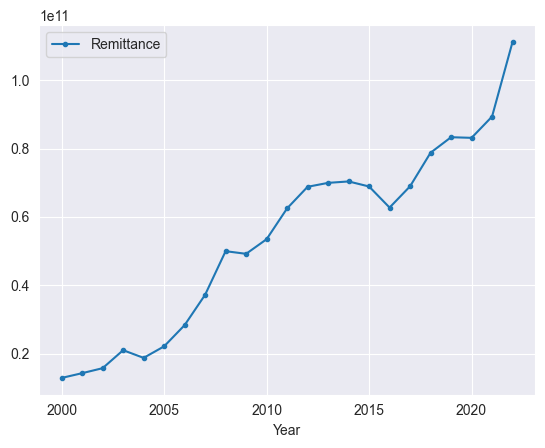

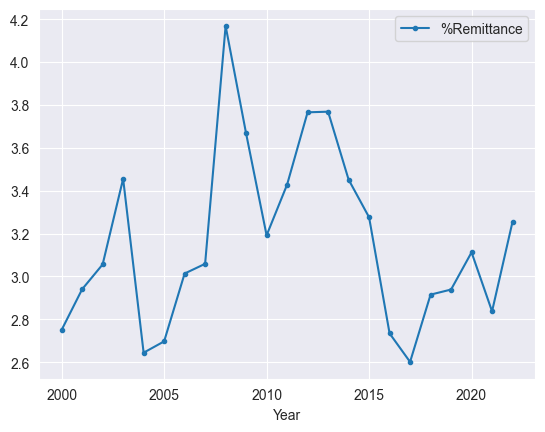

In [68]:
final_table[final_table['Country Name']=='India'][['Year', 'Remittance']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='India'][['Year', '%Remittance']].set_index('Year').plot(marker='.');

### 3.9. Tajikistan as a case study

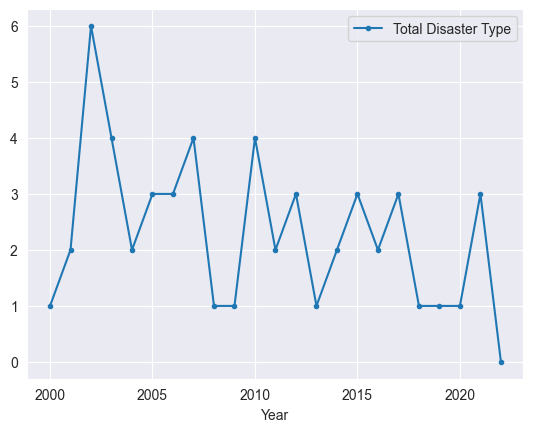

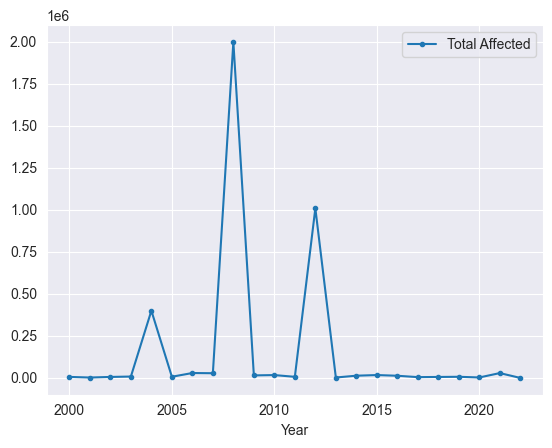

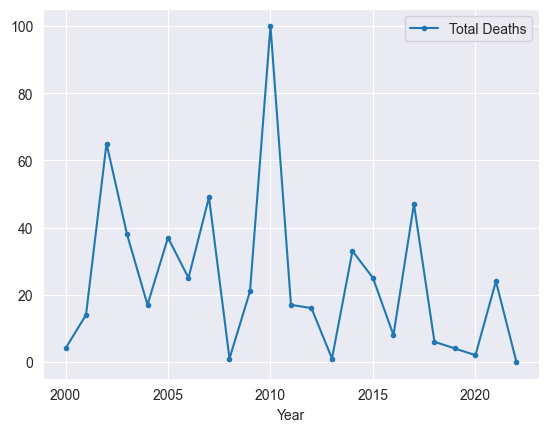

In [69]:
final_table[final_table['Country Name']=='Tajikistan'][['Year', 'Total Disaster Type']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Tajikistan'][['Year', 'Total Affected']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Tajikistan'][['Year', 'Total Deaths']].set_index('Year').plot(marker='.');

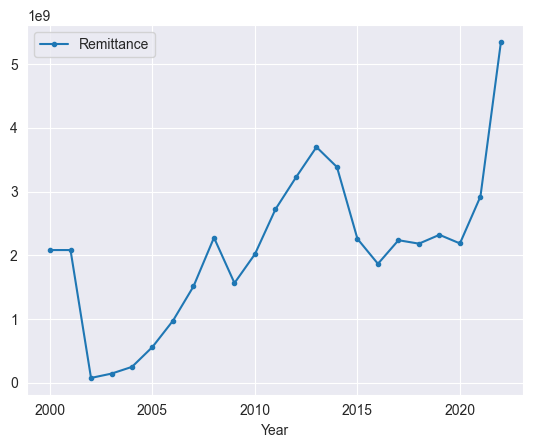

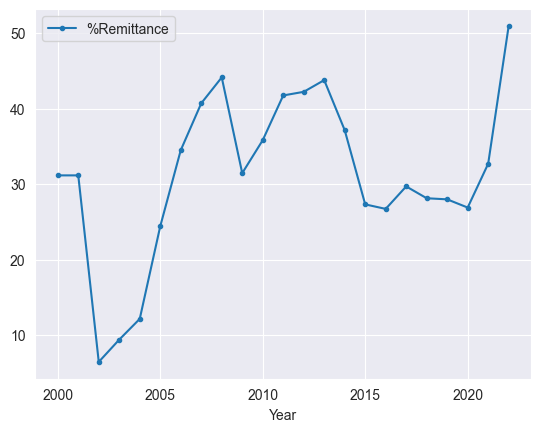

In [70]:
final_table[final_table['Country Name']=='Tajikistan'][['Year', 'Remittance']].set_index('Year').plot(marker='.');
final_table[final_table['Country Name']=='Tajikistan'][['Year', '%Remittance']].set_index('Year').plot(marker='.');